In [5]:
import numpy as np
from qlearningAgent import QlearningAgent
from matplotlib import pyplot as plt
import pandas as pd

In [6]:
print_debug = True

In [11]:
class ColumnGame():
    def __init__(self, agent: QlearningAgent, depth: int = 2):
        self.agent = agent
        self.gain = 50
        self.depth = depth
        self.acumulated_reward = 0
        self.action_set = [
            #'R', # Choose the column on the right
            #'L', # Choose the column on the left
            'B', # Choose the bigger column
            'S', # Choose the smaller column
            #'1', # Choose the first apearing column
            #'2'  # Choose the second column to apear
            ]

    def start_game(self):
        col_sizes = (
            self.gain + self.gain*0.4,
            self.gain + self.gain*-0.4
        )
        state = (
            0, # Current depth
            self.gain,
            np.random.choice(["R", "L"]), # Bigger column
            np.random.choice(["R", "L"]) # First column to appear
        )

        df= pd.DataFrame(columns=["horizon", "current_depth", "chosen_big", "chosen_right", "chosen_first", "performance"])
        for i in range(self.depth):
            if print_debug: print("\n\nState: depth:", state[0], ", Bigger Column:", state[1], ", First column to appear:", state[2])
            action = self.agent.take_action_learn(state, self.action_set)
            if print_debug: print("the agent chose the column that is ", action)
            col = 0
            match action:
                case "B":
                    col = 0
                case "S":
                    col = 1
                case "R":
                    if state[1] != "R": col = 1
                case "L":
                    if state[1] != "L": col = 1
                case "1":
                    if state[1] != state[2]: col = 1
                case "2":
                    pos = "R"
                    if state[2] == "R": pos = "L"
                    if state[1] != pos: col = 1
            
            if col == 0:
                self.gain /= 5
                if print_debug: print("the gain is reduced to", self.gain)
            else:
                self.gain *= 5
                if print_debug: print("The gain is incremented to", self.gain)
            reward = col_sizes[col]
            if print_debug and col == 0: print("The agent chose the bigger column, , giving a reward of", col_sizes[0])
            if print_debug and col == 1: print("The agent chose the smaller column, giving a reward of", col_sizes[0])
            col_sizes = (
                self.gain + self.gain*0.1,
                self.gain + self.gain*-0.1
            )
            state = (
                i+1, # Current depth
                self.gain,
                np.random.choice(["R", "L"]), # Bigger column
                np.random.choice(["R", "L"]) # First column to appear
            )
            self.acumulated_reward += reward
            if print_debug: print("The current acumulated reward is", self.acumulated_reward)
            self.agent.update_qtable(reward, state, self.action_set)
            performance = 0
            if self.depth == i+1:
                if col == 0:
                    performance = 1
            else:
                if col == 1:
                    performance = 1
            new_record = pd.DataFrame([{"horizon": self.depth, "current_depth": i+1, "chosen_big": col == 0, "chosen_right": (col == 0) == (state[1] == "R"), "chosen_first": (col == 0) == (state[2] == "R"), "performance": performance}])
            df = pd.concat([df, new_record], ignore_index=True)
        if print_debug: print("END OF THE EPISODE _______________________________________________\n\n")
        self.agent.clear_next_episode()
        return df




State: depth: 0 , Bigger Column: 50 , First column to appear: L
current_state setted to None
exploratory
the agent chose the column that is  S
The gain is incremented to 250
The agent chose the smaller column, giving a reward of 70.0
The current acumulated reward is 30.0
Inmediate reward: 30.0
update 0.0 =  0.0 + 0.8 *( 30.0 + 0.9 * 0.0 - 0.0 )
The new value of ((0, 50, 'L', 'R'), 'S') is  24.0


State: depth: 1 , Bigger Column: 250 , First column to appear: R
current_state setted to ((0, 50, 'L', 'R'), 'S')
exploratory
the agent chose the column that is  B
the gain is reduced to 50.0
The agent chose the bigger column, , giving a reward of 275.0
The current acumulated reward is 305.0
Inmediate reward: 275.0
update 0.0 =  0.0 + 0.8 *( 275.0 + 0.9 * 0.0 - 0.0 )
The new value of ((1, 250, 'R', 'L'), 'B') is  220.0
END OF THE EPISODE _______________________________________________




State: depth: 0 , Bigger Column: 50 , First column to appear: R
current_state setted to None
exploratory

,horizon,current_depth,chosen_big,chosen_right,chosen_first,performance
0,2,1,False,True,False,1
1,2,2,True,False,True,1
2,2,1,False,True,True,1
3,2,2,True,False,True,1
4,2,1,True,False,False,0
...,...,...,...,...,...,...
195,2,2,False,True,True,0
196,2,1,False,True,False,1
197,2,2,True,False,False,1
198,2,1,False,True,False,1


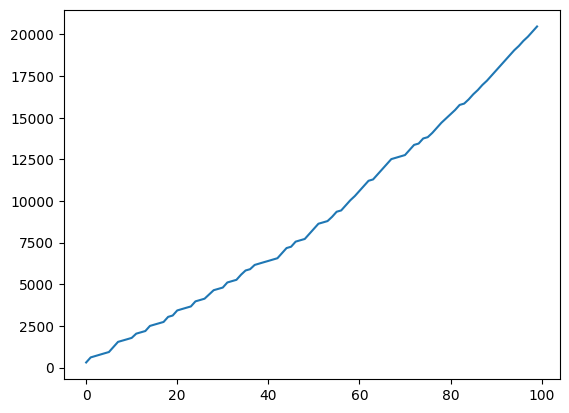

In [13]:
qlearning = QlearningAgent(learning_rate=0.8, exploration_factor=0.8, print_debug = print_debug, exploration_factor_progression=0.96)
rewards = []
df = None
for i in range(100):
    game = ColumnGame(qlearning, depth=2)
    df_game = game.start_game()
    df = pd.concat([df, df_game], ignore_index=True)
    rewards.append(qlearning.accumulated_reward)
# Prints the list of rewards and shows the final reward
df.to_csv("qlearning-output.csv")
plt.plot(rewards)
print(rewards[-1])
df

In [10]:
qlearning.q_table
    

defaultdict(float,
            {((0, 50, 'R', 'L'), 'B'): 79.23427328000001,
             ((1, 10.0, 'R', 'L'), 'B'): 10.99648,
             ((1, 10.0, 'R', 'L'), 'S'): 7.2,
             ((2, 2.0, 'L', 'L'), 'B'): 0.0,
             ((2, 2.0, 'L', 'L'), 'S'): 0.0,
             ((0, 50, 'L', 'L'), 'S'): 232.56045714603704,
             ((1, 250, 'L', 'L'), 'B'): 220.0,
             ((1, 250, 'L', 'L'), 'S'): 224.99999999999991,
             ((2, 1250, 'R', 'R'), 'B'): 0.0,
             ((2, 1250, 'R', 'R'), 'S'): 0.0,
             ((0, 50, 'R', 'R'), 'B'): 56.0,
             ((1, 10.0, 'R', 'R'), 'B'): 0.0,
             ((1, 10.0, 'R', 'R'), 'S'): 8.9998848,
             ((2, 50.0, 'R', 'L'), 'B'): 0.0,
             ((2, 50.0, 'R', 'L'), 'S'): 0.0,
             ((1, 250, 'R', 'R'), 'B'): 274.9999999999279,
             ((1, 250, 'R', 'R'), 'S'): 0.0,
             ((0, 50, 'R', 'R'), 'S'): 275.7023959625736,
             ((2, 1250, 'R', 'L'), 'B'): 0.0,
             ((2, 1250, 'R', 'L'), 